# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

## importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset And show first 5 rows and last 5 columns


In [2]:
df=pd.read_csv('dataset/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This shows the complete informaton about the dataset , here we have total 13 data Columns with 614 entries and dataset is in the form of DataFrame

In [5]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 614 Columns: 13


In [6]:
#Lets check the  Datatypes of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we have float64(4), int64(1), object(8)

In [7]:
#Lets chcek the null values 
for col in df.columns:
    print(" column name :",col," Null values: ",df[col].isnull().sum())

 column name : Loan_ID  Null values:  0
 column name : Gender  Null values:  13
 column name : Married  Null values:  3
 column name : Dependents  Null values:  15
 column name : Education  Null values:  0
 column name : Self_Employed  Null values:  32
 column name : ApplicantIncome  Null values:  0
 column name : CoapplicantIncome  Null values:  0
 column name : LoanAmount  Null values:  22
 column name : Loan_Amount_Term  Null values:  14
 column name : Credit_History  Null values:  50
 column name : Property_Area  Null values:  0
 column name : Loan_Status  Null values:  0


Here we can see the presence of null values in each column.

In [8]:
#filling the missing values for numerical terms with the help of mean
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
#filling the missing values for categorical terms with the help of mode
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#Lets check the corrrelation matrix
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [12]:
#Lets describe the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


There is difference between mean value and median so there can outliers present in the data set

In [13]:
# Checking the counts of label categories
loan = df['Loan_Status'].value_counts(normalize=True)
round(loan * 100, 2).astype('str') + ' %'

Y    68.73 %
N    31.27 %
Name: Loan_Status, dtype: object

The dataset is unbalanced, as the dependent feature 'Loan_Status' contains 68.73 % values have Yes for the loan and 31.07% values have No for the loan.

## Exploratory Data analysis

## Univariate Analysis:

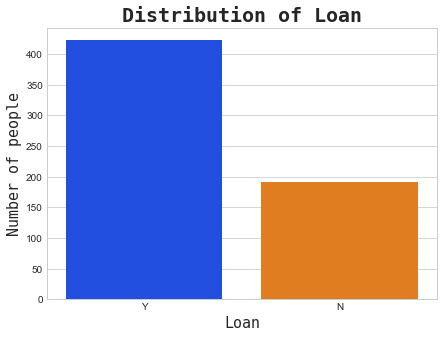

In [14]:
# Creating a barplot for 'Loan_Status'
loan = df['Loan_Status'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(loan.index, loan.values, palette='bright')
plt.title('Distribution of Loan', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Loan', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


Here we can see that the data is highly imbalanced as no of people of Yes loan status are very high than the people with No status.

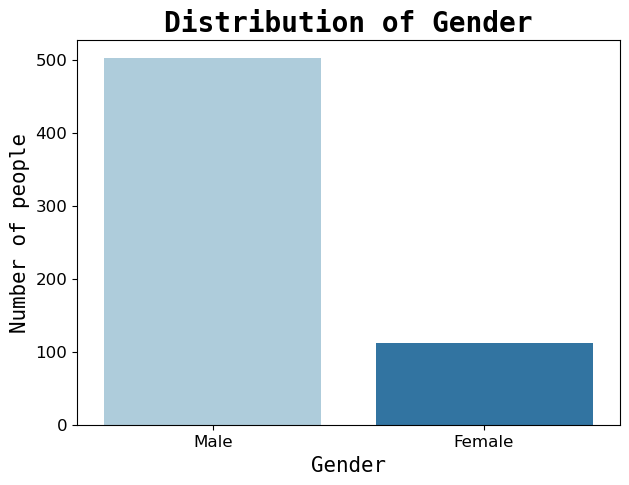

In [15]:
# Creating a barplot for 'Gender'
gen = df['Gender'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(y=gen.values, x=gen.index, palette='Paired')
plt.title('Distribution of Gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here the number of males are very high with comparsion to Female

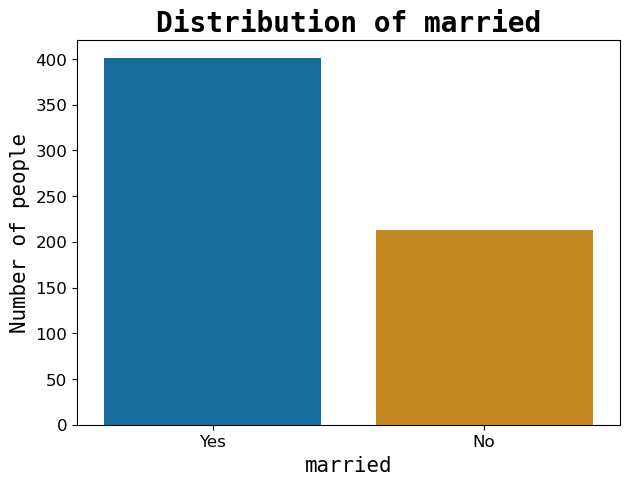

In [16]:
# Creating a barplot for 'Married'
married = df['Married'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(y=married.values, x=married.index, palette='colorblind')
plt.title('Distribution of married', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('married', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here number of people who are married and apply for the loan are very high incomparison to not-married people.

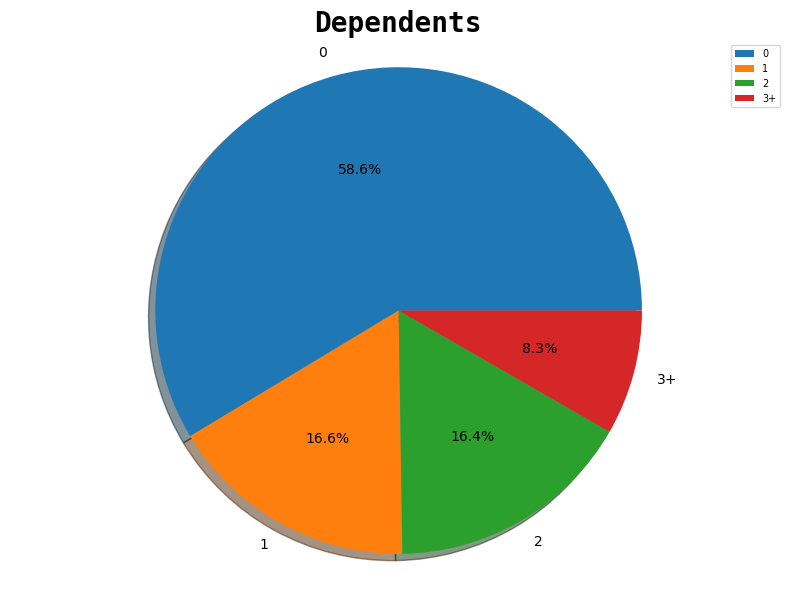

In [17]:
# Creating a pie chart for 'Dependents'
depend = df['Dependents'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(depend.values, labels=depend.index,shadow=True, autopct='%1.1f%%')
plt.title('Dependents', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Here we can see that most of the people are those who are not dependents on others with a ratio of 58.6%

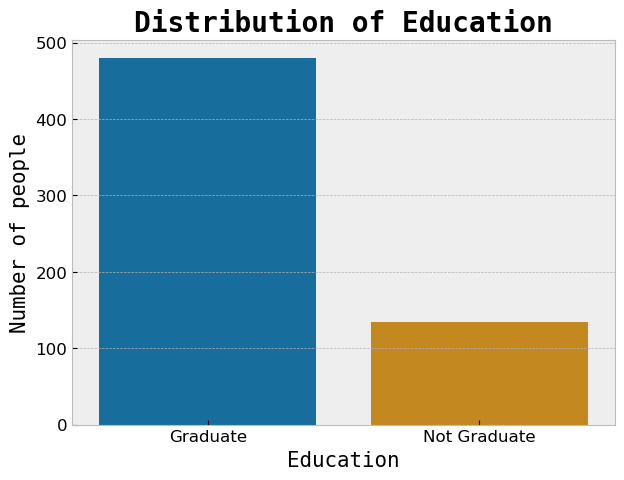

In [18]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(7, 5))
sns.barplot(y=edu.values, x=edu.index, palette='colorblind')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that Graduate people are more who apply for the loan.

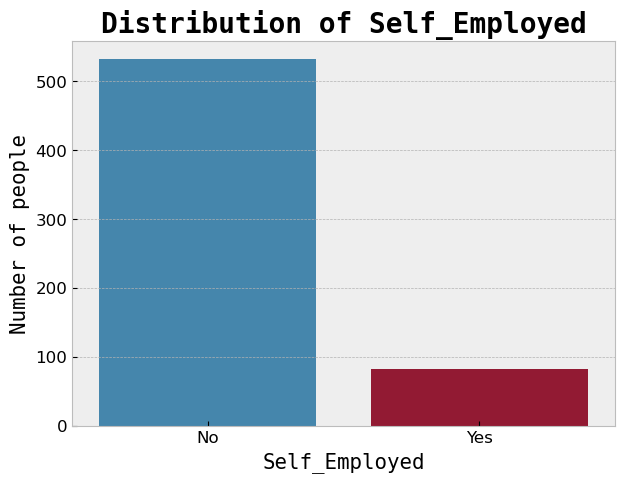

In [21]:
# Creating a barplot for 'Self_Employed'
self_emp = df['Self_Employed'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(y=self_emp.values, x=self_emp.index)
plt.title('Distribution of Self_Employed', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Self_Employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

The number of people who are Not self-employed are the ones who apply for the loan more.

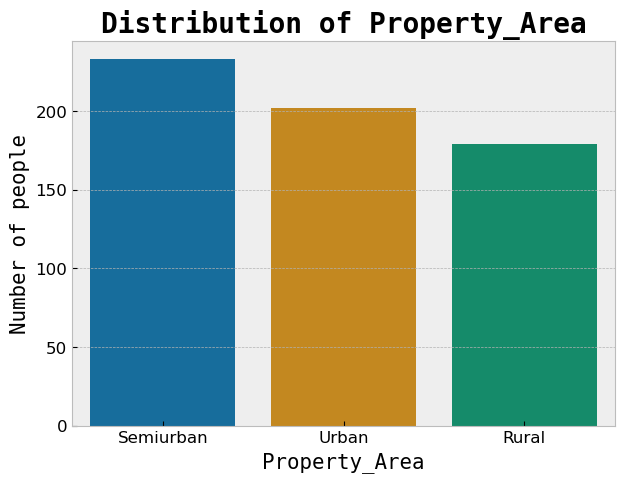

In [22]:
# Creating a barplot for 'Property_Area'
prop_area = df['Property_Area'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(y=prop_area.values, x=prop_area.index,palette='colorblind')
plt.title('Distribution of Property_Area', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Property_Area', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

THe most number of people are from the Semiurban area who applied for the loan

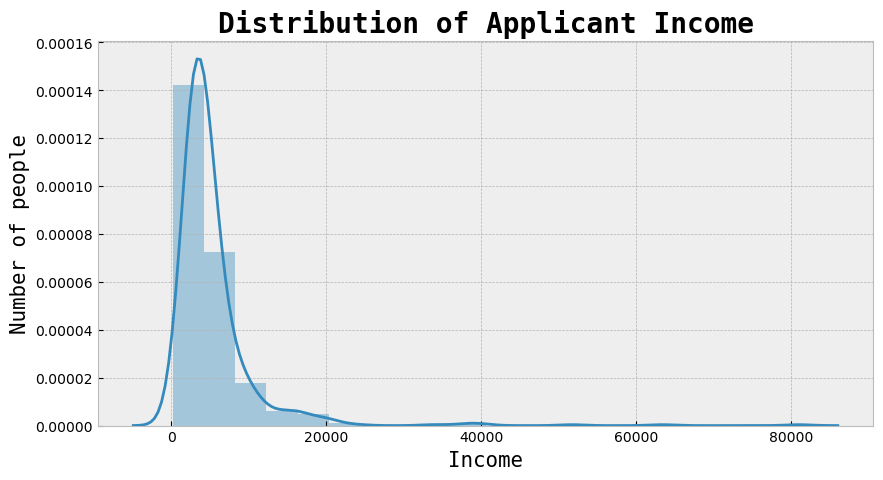

In [23]:
# Creating a distribution plot for 'ApplicantIncome'
income = df['ApplicantIncome'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['ApplicantIncome'], bins=20)
plt.title('Distribution of Applicant Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that most of the applicant have income inbetween 5000 to 10000

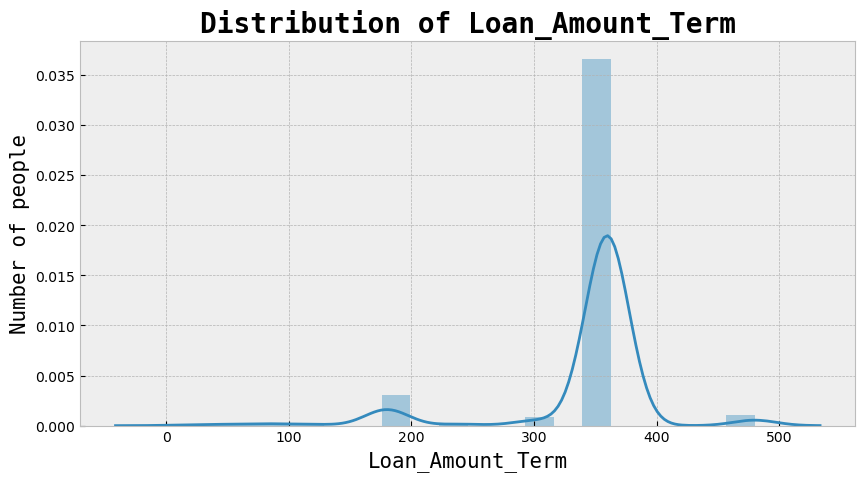

In [25]:
# Creating a distribution plot for 'Loan_Amount_Term'
loan_amt = df['Loan_Amount_Term'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['Loan_Amount_Term'], bins=20)
plt.title('Distribution of Loan_Amount_Term', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Loan_Amount_Term', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

The data is skewed and the values are highly lies in between 300 to 400.



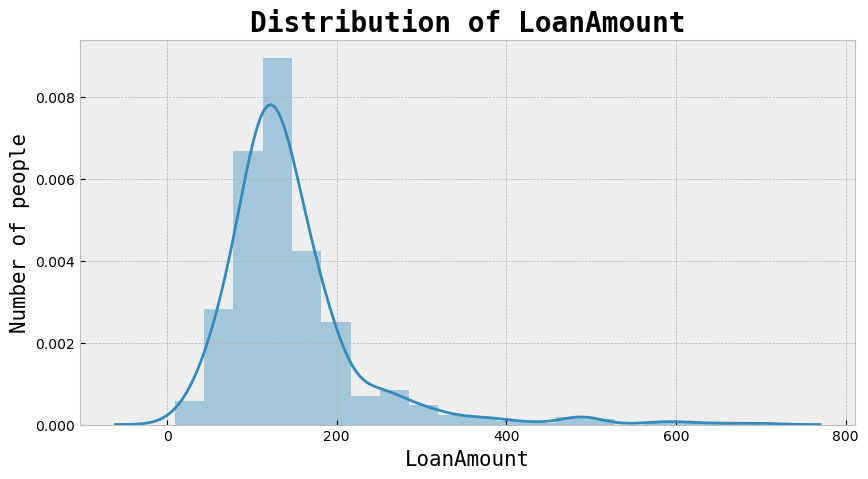

In [26]:
# Creating a distribution plot for 'LoanAmount'
loan = df['LoanAmount'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['LoanAmount'], bins=20)
plt.title('Distribution of LoanAmount', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LoanAmount', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here the loan amount is distributed between 50 to 150.

## Bivariate Analysis:

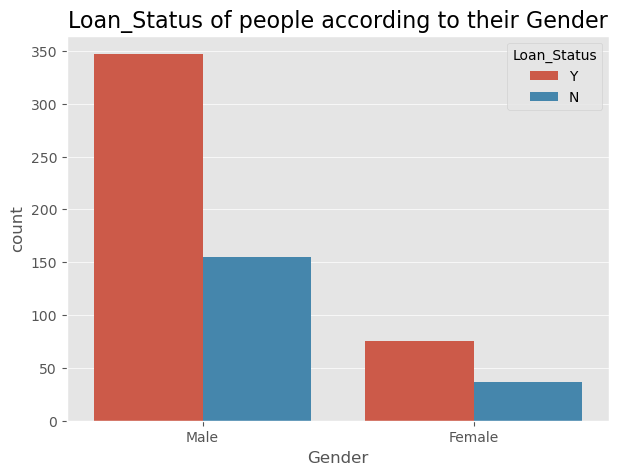

In [27]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.title("Loan_Status of people according to their Gender", fontsize = 16)
sns.countplot(x = df['Gender'], hue = df['Loan_Status'])
plt.show()

Here the most number of male have the Loan status of Yes in comparison to female i.e Male takes the more loan than the female.

In [28]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

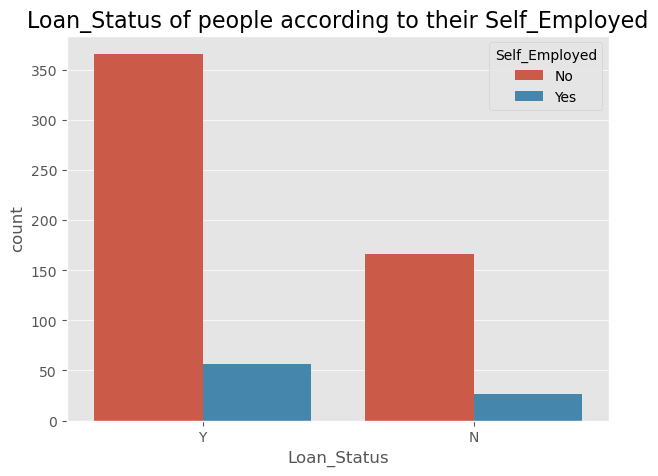

In [29]:
#lets check the count of loan status considering "Self_Employed"
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.title("Loan_Status of people according to their Self_Employed", fontsize = 16)
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)
plt.show()

Here we can see that Not Self-employed people takes More loan than the employed eople.

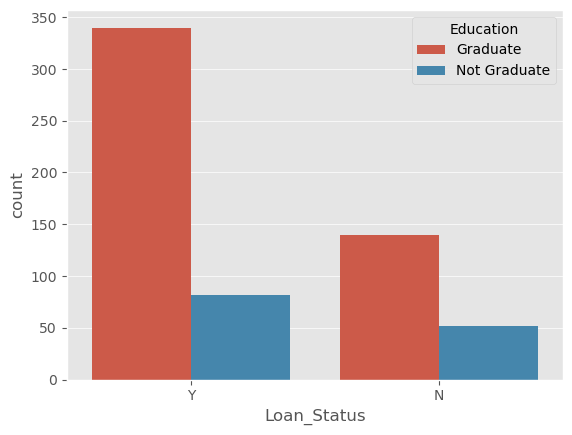

In [30]:
#Lets check the count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

people who are graduated has tendency of getting loans than who are not.

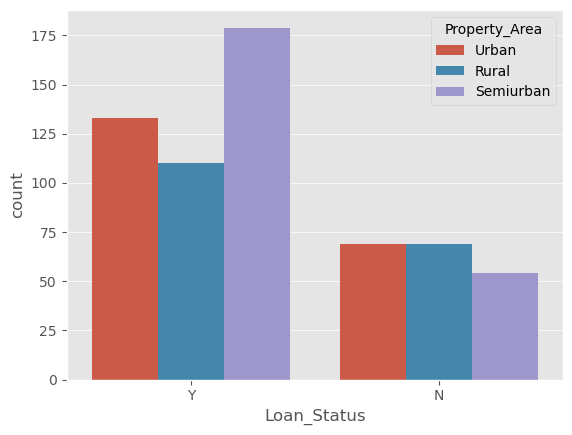

In [31]:
#lets chcek the loan status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

The people from SemiUrban takes the more after that people from Urban takes the loan.

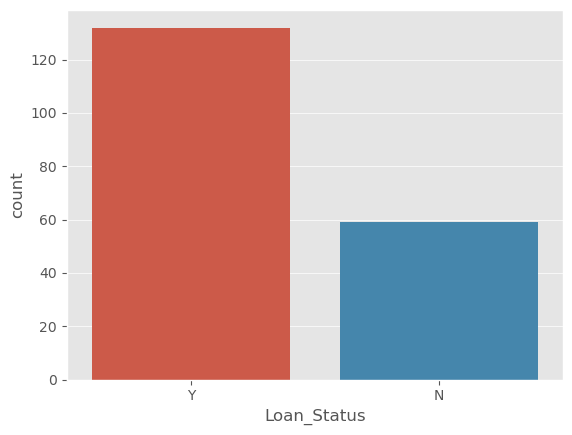

In [32]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000])
plt.show()

people whose loan was sanctioned are more than double of people whose loan was not sanctioned

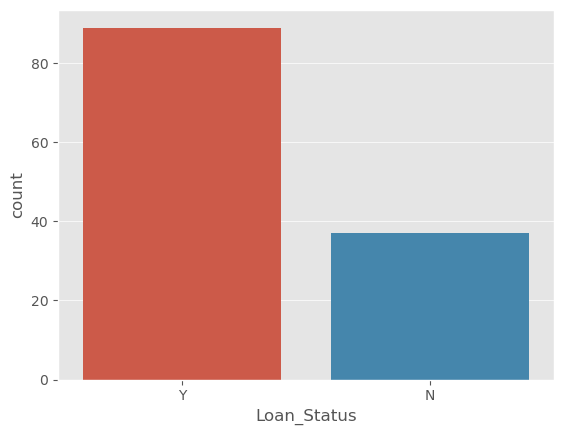

In [33]:
#Lets check what is the effect on above count if co-aplicant income is 0
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>5000)&(df["CoapplicantIncome"]==0)])
plt.show()

count reduced but still ratio is almost same.

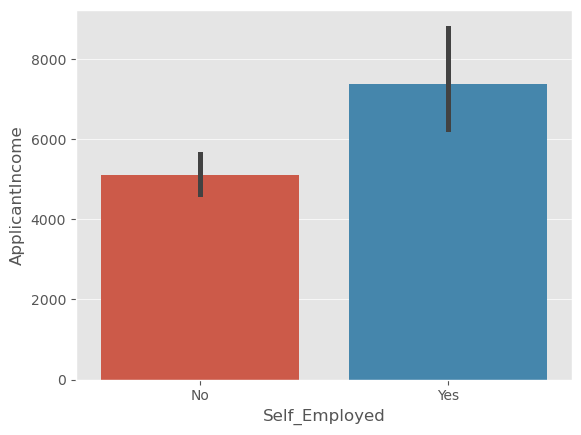

In [34]:
#Lets compare the average income of employed and self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=df)
plt.show()

Here we can see that the self Employed people whose average income is high gets the loan.

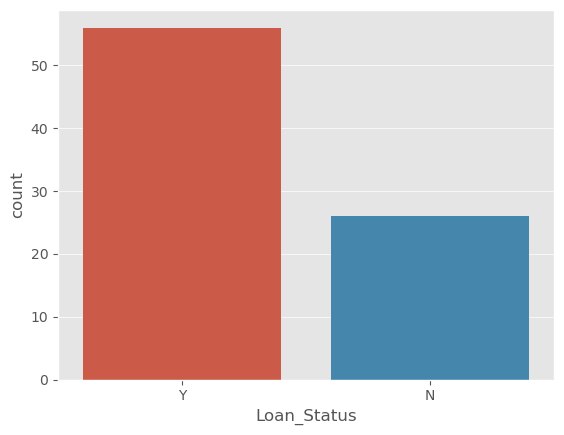

In [35]:
#Lets compare the count of people who got loans and who didn't
sns.countplot(x="Loan_Status",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

here we can see that there are more than double self-employed who got loan

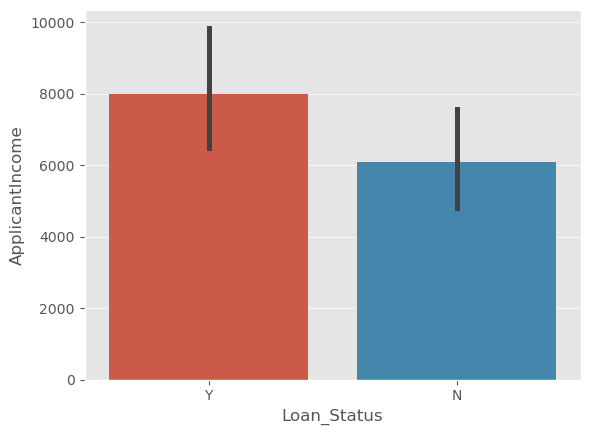

In [36]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

So people who got loan has averge income more and it is expected

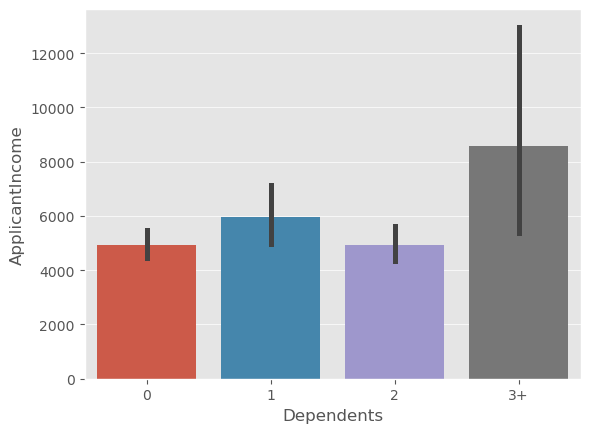

In [37]:
# let's check the average loan amount as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

Here we can see that the Average income of dependents of with 2 is less than with 1 and 3+ are very high incomparison to others

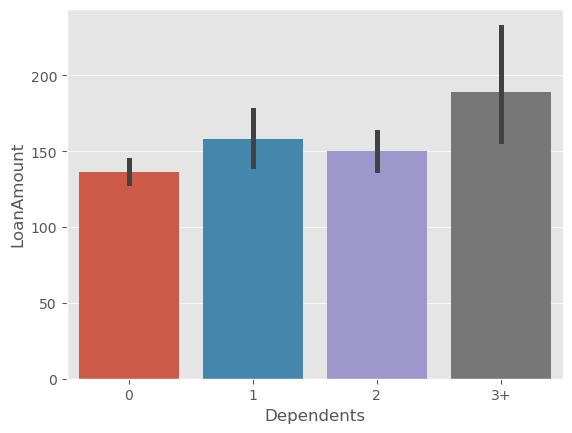

In [38]:
#lets check the average loan amount requested
sns.barplot(y="LoanAmount",x="Dependents",data=df)
plt.show()

Averge loan amount by person with dependents more than 3 is highest.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

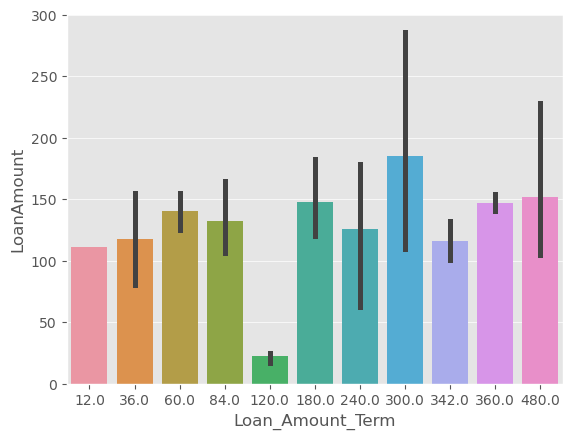

In [39]:
#Average loan amount requested groupped by Loan_Amount_Term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)

we can see that 300+ amount is usually is the loan amount taken by the people.

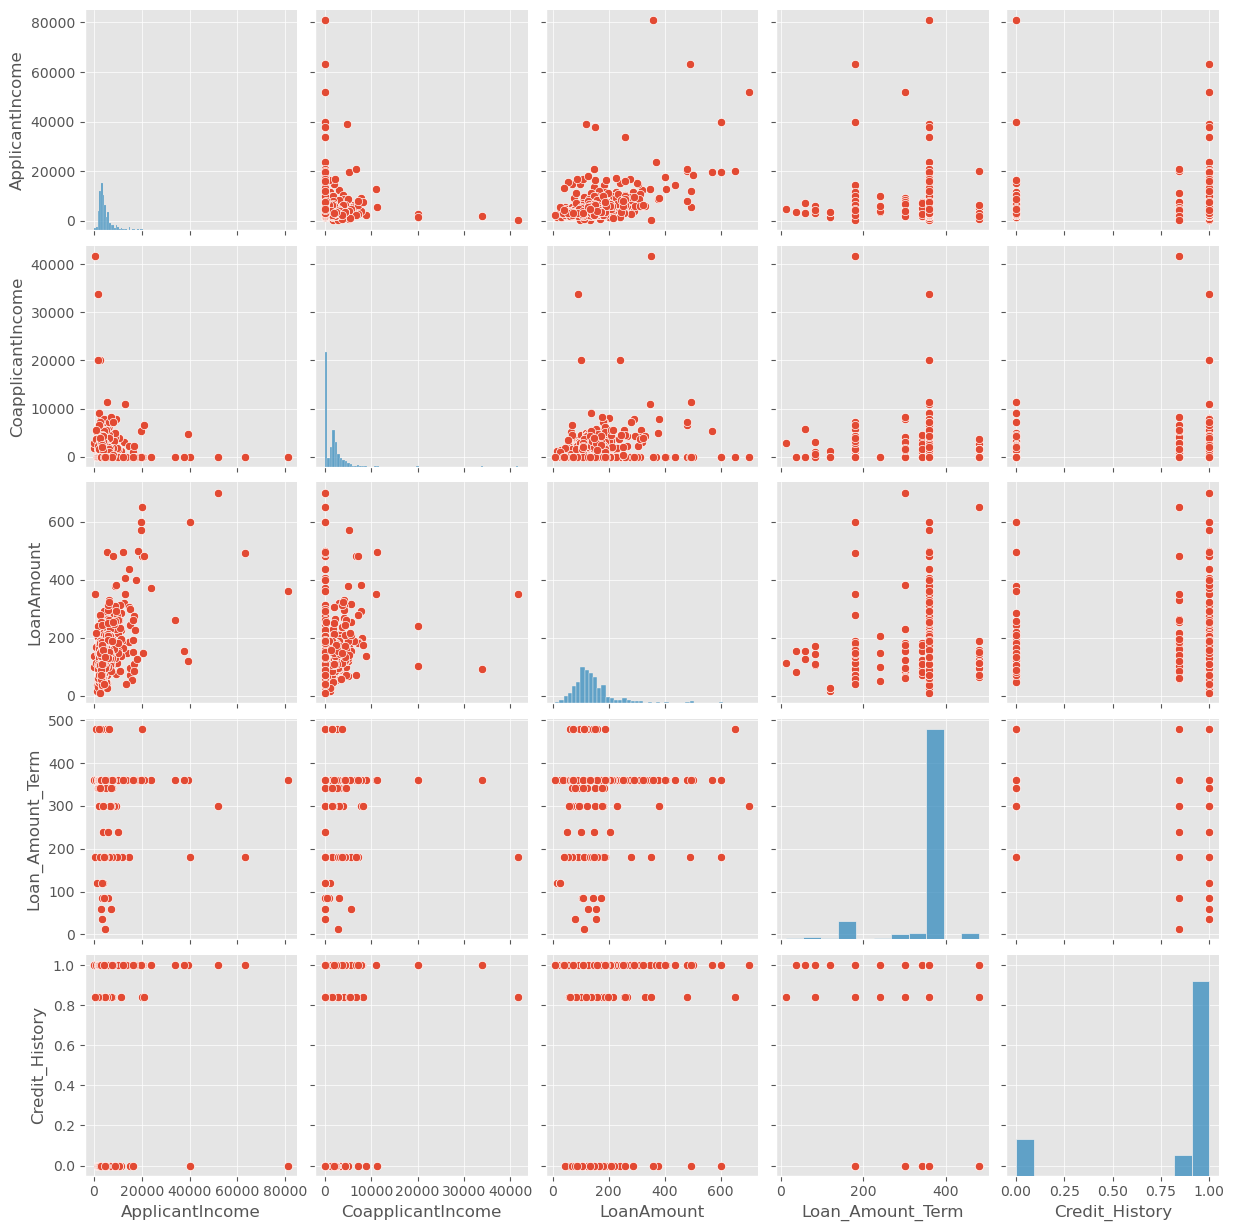

In [40]:
sns.pairplot(df)

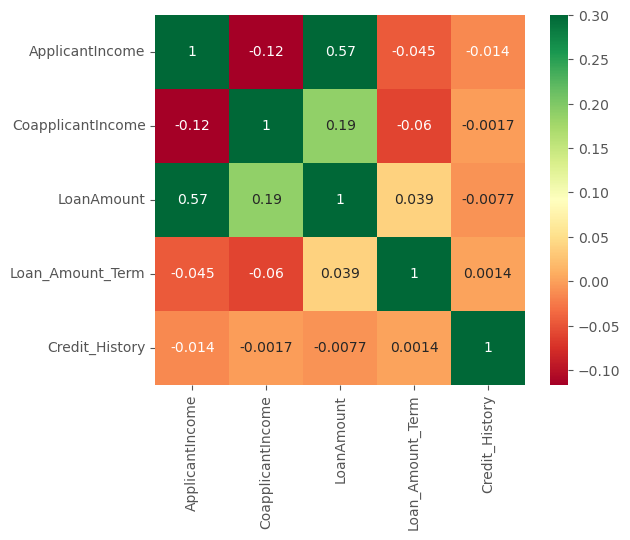

In [41]:
df_cor =df.corr()
sns.heatmap(df_cor, vmax=.3, square=True,annot=True, cmap='RdYlGn')
plt.show()

Here we can see that LoanAmount and CoApplicant Amount are highly correlated.

In [42]:
#lets check the skewness of the dataset
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

there are some skewness present in the dataset.



In [43]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']

for index in skew:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    else:
        df.skew().loc[index]<-0.55
        df[index]=np.sqrt(df[index])

In [44]:
#lets chcek the skewness
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -3.175195
Credit_History      -2.005377
dtype: float64

In [45]:
#Lets check the datatypes in input dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
#we can delete loan id as it has no significance in prediction
df.drop(columns=["Loan_ID"],inplace=True)

## Label Encoding:

In [47]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [48]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,18.973666,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,18.973666,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,18.973666,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,18.973666,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,18.973666,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,18.973666,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,3.713572,13.416408,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,5.537334,18.973666,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,5.236442,18.973666,1.0,2,1


## Removing Outliers:

We check if any outliers are present in the continous attributes of the dataset. We check it both by visualisations and the zscore for the continous columns.



Gender                  AxesSubplot(0.125,0.712609;0.133621x0.167391)
Married              AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Dependents            AxesSubplot(0.44569,0.712609;0.133621x0.167391)
Education            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Self_Employed        AxesSubplot(0.766379,0.712609;0.133621x0.167391)
ApplicantIncome         AxesSubplot(0.125,0.511739;0.133621x0.167391)
CoapplicantIncome    AxesSubplot(0.285345,0.511739;0.133621x0.167391)
LoanAmount            AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Loan_Amount_Term     AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Credit_History       AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Property_Area            AxesSubplot(0.125,0.31087;0.133621x0.167391)
Loan_Status           AxesSubplot(0.285345,0.31087;0.133621x0.167391)
dtype: object

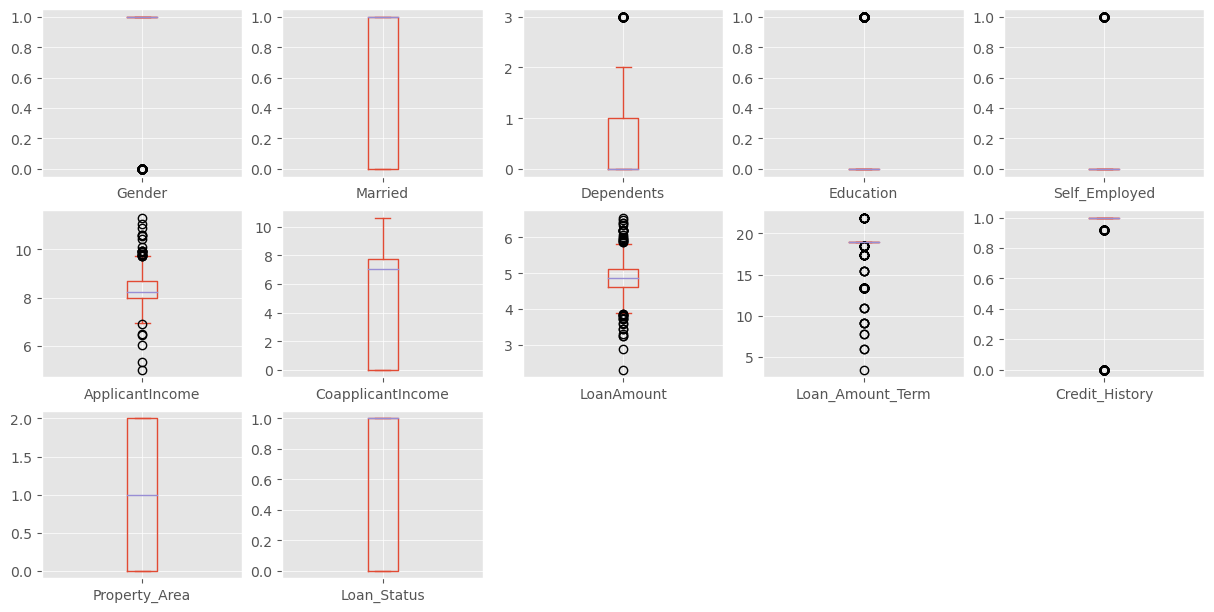

In [49]:

#Plotting the boxplot of each coumn to check the outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

As we can see Outliers are present in the continous columns of the feature. We will check the z-score of the features and and clip them from the data.

In [50]:
from scipy.stats import zscore
zabs = np.abs(zscore(df))
print(np.shape(np.where(zabs >= 3)))
df_new = df[(zabs < 3).all(axis = 1)]
df_new

(2, 32)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,18.973666,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,18.973666,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,18.973666,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,18.973666,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,18.973666,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,18.973666,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,3.713572,13.416408,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,5.537334,18.973666,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,5.236442,18.973666,1.0,2,1


We have a total of 32 outliers in the data. After removing the outliers, we have 586 observations left.

In [51]:
df.shape


(614, 12)

In [52]:
df_new.shape

(587, 12)

In [53]:
df=df_new

## Feature Selection:

In [54]:
X=df.drop('Loan_Status',axis=1)
Y=df[['Loan_Status']]

In [55]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling:

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
sm.fit(X, Y)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

In [57]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

Loan_Status
0              50.0 %
1              50.0 %
dtype: object

### Creating a train test split

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [60]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (646, 11)
X_test shape: (162, 11)
Y_train shape: (646, 1)
Y_test shape: (162, 1)


In [61]:
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier()
dtc= DecisionTreeClassifier()

In [62]:
model = [lg,gnb,sv,rf,ada,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print("Mean cross_validation score for model: ",cross_val_score(m,X_resampled, Y_resampled,cv=5).mean())
    print("standard deviation in cross_validation score: ",cross_val_score(m,X_resampled, Y_resampled,cv=5).std())
    print(cross_val_score(m,X_resampled, Y_resampled,cv=5))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.6666666666666666
[[37 47]
 [ 7 71]]
              precision    recall  f1-score   support

           0       0.84      0.44      0.58        84
           1       0.60      0.91      0.72        78

    accuracy                           0.67       162
   macro avg       0.72      0.68      0.65       162
weighted avg       0.73      0.67      0.65       162

Mean cross_validation score for model:  0.7190246146767886
standard deviation in cross_validation score:  0.015564602338868354
[0.70987654 0.7345679  0.74074074 0.70807453 0.70186335]


Accuracy score of  GaussianNB() is:
0.6666666666666666
[[32 52]
 [ 2 76]]
              precision    recall  f1-score   support

           0       0.94      0.38      0.54        84
           1       0.59      0.97      0.74        78

    accuracy                           0.67       162
   macro avg       0.77      0.68      0.64       162
weighted avg       0.77      0.67      0.64       162

Mean

### Observation:

Here ,the Minimum difference in Accuracy and cross validation score is for RandomForestClassifier, so this is our best model for the prediction

## Hyperparameter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(40, 150, num = 10)]
max_depth.append(None)

criterion= ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion}

model = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=76, max_features='auto',
                       n_estimators=76)
0.8220274299344068


In [64]:
Rfc = RandomForestClassifier(max_depth=40)
Rfc.fit(x_train,y_train)
pred=Rfc.predict(x_test)
acc_sc= accuracy_score(y_test,pred)
print("accuracy score :",acc_sc*100)

accuracy score : 85.18518518518519


In [65]:
#Calculating the scores of different parameters
score=cross_val_score(Rfc,X_resampled,Y_resampled,cv=5,scoring='accuracy').mean()
print('Cross_val_score: ',score*100)
print('Mean Score: ',score.mean()*100)
print('STD Score: ',score.std())

Cross_val_score:  83.3011272141707
Mean Score:  83.3011272141707
STD Score:  0.0


### ROC curve and score

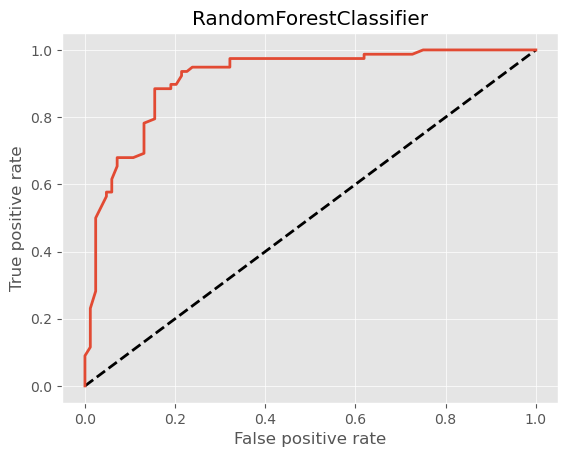

0.8534798534798534

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,Rfc.predict(x_test))
auc_score

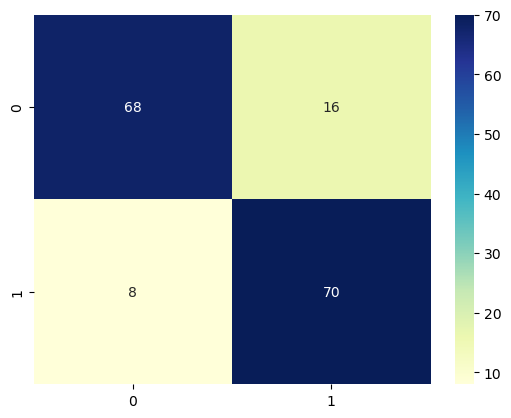

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        84
           1       0.81      0.90      0.85        78

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.86      0.85      0.85       162



After the model evaluation , we get the precision and recall for both the target variable as 0.89 and 0.81. The f1- score of the model is 0.93. The ROC curve gave us the AUC score which is 0.85. Model evaluation gives the results that the prediction is very accurate.

## Saving the model

In [69]:
#saving the model
model=joblib.dump(Rfc,'loan_rfc.obj')

### Conclusion:



In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier, Adaboost classifier and Gaussian Naive Bayes

A hyperparameter tuned random forest classifier gives the highest accuracy score of 85 and Auc roc score of 0.85.

Our best model gives True Positive rate very high i.e 76 and False negative are very low i.e.6